# parPE example: steadystate model - minibatch optimization

This example demonstrates some basic use of the mini-batch optimizer in parPE.

## Prerequisites

The prerequisites mention in `parpeExampleSteadystateBasic.ipynb` also apply to this notebook.

In [1]:
import amici
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from importlib import reload

# set paths
parpe_source_root = os.path.abspath('../../../')
parpe_build_root = os.path.join(parpe_source_root, 'build') 

model_source_dir = f'{parpe_build_root}/examples/parpeamici/steadystate/steadystate_scaled-prefix/src/steadystate_scaled/model_steadystate_scaled'
example_binary_dir = f'{parpe_build_root}/examples/parpeamici/steadystate/'
example_data_dir = f'{parpe_build_root}/examples/parpeamici/steadystate/steadystate_scaled-prefix/src/steadystate_scaled'
optimizationOptionsPy = f'{parpe_source_root}/misc/optimizationOptions.py'

# load parpe module from source tree
sys.path.insert(0, os.path.join(parpe_source_root, 'python'))
import parpe

In [2]:
# rebuild example
!cd {parpe_build_root} && make

[  9%] Built target parpecommon
Scanning dependencies of target parpeoptimization
[ 10%] Building CXX object src/parpeoptimization/CMakeFiles/parpeoptimization.dir/optimizationResultWriter.cpp.o
[ 11%] Linking CXX static library libparpeoptimization-dbg.a
[ 20%] Built target parpeoptimization
[ 23%] Built target parpeloadbalancer
Scanning dependencies of target parpeamici
[ 25%] Building CXX object src/parpeamici/CMakeFiles/parpeamici.dir/optimizationApplication.cpp.o
[ 26%] Linking CXX static library libparpeamici-dbg.a
[ 35%] Built target parpeamici
[ 36%] Built target parpe
-- Found Git: /usr/bin/git (found version "2.20.1") 
-- Building version parPE-v0.3.0-49-g32a2-dirty
[ 36%] Built target get_version
[ 42%] Built target unittests_common
[ 47%] Built target unittests_loadbalancer
[ 48%] Linking CXX executable unittests_optimization
/usr/bin/ld: CMakeFiles/unittests_optimization.dir/main.cpp.o: in function `optimizationOptions_fromHDF5_Test::TestBody()':
/home/dweindl/src/parPE_2/

In [3]:
# run make test to generated all output files required below
# !cd {parpe_build_root} && make test

## Mini-batch optimization

In [4]:
hdf5FileMinibatch = f'{example_data_dir}/example_data_minibatch.h5'
!cp {example_data_dir}/example_data.h5 {hdf5FileMinibatch}

# Generic options:
# One optimizer run 
!{optimizationOptionsPy} {hdf5FileMinibatch} -s numStarts 1
# Hierarchical optimization not yet supported with minibatch (#118)
!{optimizationOptionsPy} {hdf5FileMinibatch} -s hierarchicalOptimization 0
# Do not repeat on failure
!{optimizationOptionsPy} {hdf5FileMinibatch} -s retryOptimization 0

# Mini-batch options:
# Select mini-batch optimizer
!{optimizationOptionsPy} {hdf5FileMinibatch} -s optimizer 10
# Set number of epochs
!{optimizationOptionsPy} {hdf5FileMinibatch} -s minibatch/maxEpochs 40
# Set batch-size
!{optimizationOptionsPy} {hdf5FileMinibatch} -s minibatch/batchSize 2
# Set parameter updating scheme
!{optimizationOptionsPy} {hdf5FileMinibatch} -s minibatch/parameterUpdater Vanilla
# Set learning rate
!{optimizationOptionsPy} {hdf5FileMinibatch} -s minibatch/startLearningRate 1e-5
!{optimizationOptionsPy} {hdf5FileMinibatch} -s minibatch/endLearningRate 1e-5

# Print settings
!{optimizationOptionsPy} {hdf5FileMinibatch}

                hierarchicalOptimization            0
                               numStarts            1
                               optimizer           10
                       retryOptimization            0
                ceres/max_num_iterations          100
                         fmincon/GradObj        b'on'
                     fmincon/MaxFunEvals   10000000.0
                         fmincon/MaxIter          100
                          fmincon/TolFun            0
                            fmincon/TolX        1e-08
                       fmincon/algorithm b'interior-point'
                         fmincon/display      b'iter'
                   ipopt/acceptable_iter            1
         ipopt/acceptable_obj_change_tol        1e-05
                    ipopt/acceptable_tol        1e-05
             ipopt/hessian_approximation b'limited-memory'
        ipopt/limited_memory_update_type      b'bfgs'
                          ipopt/max_iter           20
                  

In [5]:
# Optional
!{parpe_source_root}/misc/selectStartingPoints.py {hdf5FileMinibatch} 9 # select starting point

Creating starting point backup in /optimizationOptions/randomStartsBackup
Selecting starting points [9]


In [6]:
!PARPE_MAX_SIMULATIONS_PER_PACKAGE=1 PARPE_NO_DEBUG=1 mpiexec -np 4 {example_binary_dir}/example_steadystate_multi -o deleteme-minibatch/ {hdf5FileMinibatch}

[2019-05-29 10:30:36] [INF] [0/dweindl-ThinkPad-L480] Running with 4 MPI processes.
[2019-05-29 10:30:36] [INF] [0/dweindl-ThinkPad-L480] Reading random initial theta 0 from /optimizationOptions/randomStarts
[2019-05-29 10:30:36] [INF] [0/dweindl-ThinkPad-L480] [o0e0b1] iter: 0 cost: 12557.7 time_iter: wall: 0.207342s cpu: 0.394801s time_optim: wall: 0.207342s cpu: 0.394801s
[2019-05-29 10:30:36] [INF] [0/dweindl-ThinkPad-L480] [o0e1b1] iter: 1 cost: 12556.4 time_iter: wall: 0.136016s cpu: 0.261251s time_optim: wall: 0.343358s cpu: 0.656052s
[2019-05-29 10:30:36] [INF] [0/dweindl-ThinkPad-L480] [o0e2b1] iter: 2 cost: 12445.7 time_iter: wall: 0.149478s cpu: 0.284431s time_optim: wall: 0.492836s cpu: 0.940483s
[2019-05-29 10:30:36] [INF] [0/dweindl-ThinkPad-L480] [o0e3b1] iter: 3 cost: 12444.5 time_iter: wall: 0.147236s cpu: 0.282256s time_optim: wall: 0.640073s cpu: 1.22274s
[2019-05-29 10:30:36] [INF] [0/dweindl-ThinkPad-L480] [o0e4b1] iter: 4 cost: 12231.9 time_iter: wall: 0.156792s c

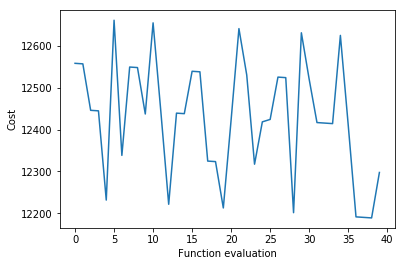

In [7]:
filename = 'deleteme-minibatch/_rank00000.h5'
with h5py.File(filename, 'r') as f:
    trajectory = f['/multistarts/0/iterCostFunCost'][:]
for start in range(trajectory.shape[0]):
    plt.plot(trajectory[start])
    plt.gca().set_xlabel("Function evaluation")
    plt.gca().set_ylabel("Cost")
#trajectory

### Compare learning rates

In [8]:
learningRates = np.logspace(-2, -5, 4)
for i, learningRate in enumerate(learningRates):
    curInputFile = "example-data-minibatch-rate-%d.h5" % i
    outprefix = "deleteme-minibatch-rate-%d/" % i
    !cp {hdf5FileMinibatch} {curInputFile}
    !{optimizationOptionsPy} {curInputFile} -s minibatch/startLearningRate learningRate
    !{optimizationOptionsPy} {curInputFile} -s minibatch/endLearningRate 1e-5
    !PARPE_MAX_SIMULATIONS_PER_PACKAGE=1 PARPE_NO_DEBUG=1 mpiexec -np 4 {example_binary_dir}/example_steadystate_multi -o {outprefix} {hdf5FileMinibatch}

[2019-05-29 10:30:45] [INF] [0/dweindl-ThinkPad-L480] Running with 4 MPI processes.
[2019-05-29 10:30:45] [INF] [0/dweindl-ThinkPad-L480] Reading random initial theta 0 from /optimizationOptions/randomStarts
[2019-05-29 10:30:46] [INF] [0/dweindl-ThinkPad-L480] [o0e0b1] iter: 0 cost: 12455.2 time_iter: wall: 0.208528s cpu: 0.394853s time_optim: wall: 0.208528s cpu: 0.394853s
[2019-05-29 10:30:46] [INF] [0/dweindl-ThinkPad-L480] [o0e1b1] iter: 1 cost: 12556.4 time_iter: wall: 0.16156s cpu: 0.303037s time_optim: wall: 0.370088s cpu: 0.69789s
[2019-05-29 10:30:46] [INF] [0/dweindl-ThinkPad-L480] [o0e2b1] iter: 2 cost: 12343.3 time_iter: wall: 0.157105s cpu: 0.303801s time_optim: wall: 0.527194s cpu: 1.00169s
[2019-05-29 10:30:46] [INF] [0/dweindl-ThinkPad-L480] [o0e3b1] iter: 3 cost: 12451.5 time_iter: wall: 0.163281s cpu: 0.310828s time_optim: wall: 0.690475s cpu: 1.31252s
[2019-05-29 10:30:46] [INF] [0/dweindl-ThinkPad-L480] [o0e4b1] iter: 4 cost: 12552.6 time_iter: wall: 0.160588s cpu:

[2019-05-29 10:30:55] [INF] [0/dweindl-ThinkPad-L480] [o0e1b1] iter: 1 cost: 12447 time_iter: wall: 0.153835s cpu: 0.296231s time_optim: wall: 0.378239s cpu: 0.71595s
[2019-05-29 10:30:55] [INF] [0/dweindl-ThinkPad-L480] [o0e2b1] iter: 2 cost: 12445.7 time_iter: wall: 0.155115s cpu: 0.294425s time_optim: wall: 0.533354s cpu: 1.01037s
[2019-05-29 10:30:55] [INF] [0/dweindl-ThinkPad-L480] [o0e3b1] iter: 3 cost: 12662.8 time_iter: wall: 0.152202s cpu: 0.294183s time_optim: wall: 0.685557s cpu: 1.30456s
[2019-05-29 10:30:55] [INF] [0/dweindl-ThinkPad-L480] [o0e4b1] iter: 4 cost: 12661.6 time_iter: wall: 0.150983s cpu: 0.289499s time_optim: wall: 0.836541s cpu: 1.59406s
[2019-05-29 10:30:56] [INF] [0/dweindl-ThinkPad-L480] [o0e5b1] iter: 5 cost: 12339.6 time_iter: wall: 0.152514s cpu: 0.292303s time_optim: wall: 0.989055s cpu: 1.88636s
[2019-05-29 10:30:56] [INF] [0/dweindl-ThinkPad-L480] [o0e6b1] iter: 6 cost: 12659.1 time_iter: wall: 0.153035s cpu: 0.294532s time_optim: wall: 1.14209s cpu

[2019-05-29 10:31:05] [INF] [0/dweindl-ThinkPad-L480] [o0e4b1] iter: 4 cost: 12450.2 time_iter: wall: 0.167059s cpu: 0.321159s time_optim: wall: 0.881013s cpu: 1.68242s
[2019-05-29 10:31:05] [INF] [0/dweindl-ThinkPad-L480] [o0e5b1] iter: 5 cost: 12339.6 time_iter: wall: 0.170412s cpu: 0.323419s time_optim: wall: 1.05142s cpu: 2.00584s
[2019-05-29 10:31:06] [INF] [0/dweindl-ThinkPad-L480] [o0e6b1] iter: 6 cost: 12440.7 time_iter: wall: 0.160227s cpu: 0.307172s time_optim: wall: 1.21165s cpu: 2.31302s
[2019-05-29 10:31:06] [INF] [0/dweindl-ThinkPad-L480] [o0e7b1] iter: 7 cost: 12548.8 time_iter: wall: 0.145043s cpu: 0.279091s time_optim: wall: 1.3567s cpu: 2.59211s
[2019-05-29 10:31:06] [INF] [0/dweindl-ThinkPad-L480] [o0e8b1] iter: 8 cost: 12656.6 time_iter: wall: 0.149604s cpu: 0.289282s time_optim: wall: 1.5063s cpu: 2.88139s
[2019-05-29 10:31:06] [INF] [0/dweindl-ThinkPad-L480] [o0e9b1] iter: 9 cost: 12334.7 time_iter: wall: 0.156641s cpu: 0.294586s time_optim: wall: 1.66294s cpu: 3.

[2019-05-29 10:31:15] [INF] [0/dweindl-ThinkPad-L480] [o0e7b1] iter: 7 cost: 12548.8 time_iter: wall: 0.152612s cpu: 0.294078s time_optim: wall: 1.45945s cpu: 2.72303s
[2019-05-29 10:31:15] [INF] [0/dweindl-ThinkPad-L480] [o0e8b1] iter: 8 cost: 12335.9 time_iter: wall: 0.151003s cpu: 0.290226s time_optim: wall: 1.61045s cpu: 3.01326s
[2019-05-29 10:31:16] [INF] [0/dweindl-ThinkPad-L480] [o0e9b1] iter: 9 cost: 12655.3 time_iter: wall: 0.156076s cpu: 0.300597s time_optim: wall: 1.76653s cpu: 3.31386s
[2019-05-29 10:31:16] [INF] [0/dweindl-ThinkPad-L480] [o0e10b1] iter: 10 cost: 12545 time_iter: wall: 0.151399s cpu: 0.289941s time_optim: wall: 1.91793s cpu: 3.6038s
[2019-05-29 10:31:16] [INF] [0/dweindl-ThinkPad-L480] [o0e11b1] iter: 11 cost: 12652.8 time_iter: wall: 0.15111s cpu: 0.292252s time_optim: wall: 2.06904s cpu: 3.89605s
[2019-05-29 10:31:16] [INF] [0/dweindl-ThinkPad-L480] [o0e12b1] iter: 12 cost: 12433.2 time_iter: wall: 0.154514s cpu: 0.295709s time_optim: wall: 2.22355s cpu:

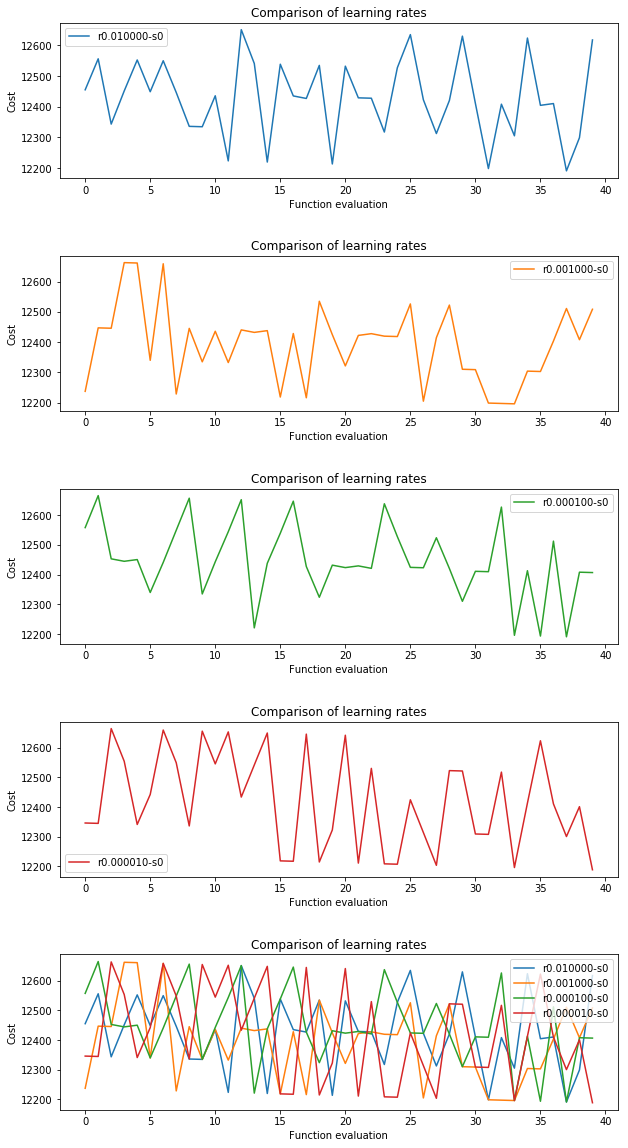

In [9]:
fig, axs = plt.subplots(nrows=len(learningRates) + 1, figsize=(10, 20))
for i, learningRate in enumerate(learningRates):
    filename = "deleteme-minibatch-rate-%d/_rank00000.h5" % i
    with h5py.File(filename, 'r') as f:
        trajectory = f['/multistarts/0/iterCostFunCost'][:]
    for start in range(trajectory.shape[0]):
        # Individual plot + overlay
        for ax in (axs[i], axs[-1]):
            ax.plot(trajectory[start], label="r%f-s%d"%(learningRate, start), color="C%d"%i)
            ax.set_xlabel("Function evaluation")
            ax.set_ylabel("Cost")
            ax.set_title("Comparison of learning rates")
            ax.legend()
plt.subplots_adjust(hspace=0.5)